
# XXXX机房IP地址规划

## 1 拓扑图

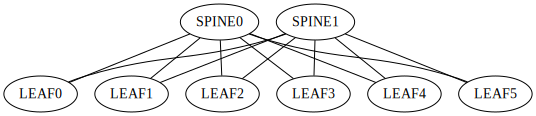

In [19]:
from graphviz import Graph

SPINES = ["SPINE%d"%i for i in range(0,2)]
LEAFS = ["LEAF%d"%i for i in range(0,6)]

dot = Graph(format='png')

for spine_node in SPINES:
    dot.node(spine_node, spine_node)
    
for leaf_node in LEAFS:
    dot.node(leaf_node, leaf_node)

for spine in SPINES:
    for leaf in LEAFS:
        dot.edge(spine, leaf)
#dir(dot)
dot.render("top1.gv")

dot

## 2 地址分配
### 2.1 总地址池

In [40]:
from netaddr import IPNetwork,IPRange,cidr_merge
IP_POOL = IPNetwork("10.123.14.0/23")
# Loop 地址
Loop_POOL = IPRange(IP_POOL[0], IP_POOL[31])
Loop_POOL = cidr_merge(Loop_POOL)

#接口地址段
Interface_POOL = IPRange(IP_POOL[32], IP_POOL[-1])
Interface_POOL = cidr_merge(Interface_POOL)
#接口地址段划分prefix len 为30 的子网。
Interface_POOL = [list(x.subnet(30)) for x in Interface_POOL]
Interface_POOL = sum(Interface_POOL, [])


### 2.2 设备名称信息

SPINE: SPINE[0-1]

LEAF: LEAF[0-5]


### 2.3 设备的LoopBack 地址信息

In [21]:
Loop_inet_address = {}
for spine in SPINES:
    Loop_inet_address[spine] = IP_POOL[len(Loop_inet_address) + 1]

for leaf in LEAFS:
    Loop_inet_address[leaf] = IP_POOL[len(Loop_inet_address) + 1]


{'LEAF0': IPAddress('10.123.14.3'),
 'LEAF1': IPAddress('10.123.14.4'),
 'LEAF2': IPAddress('10.123.14.5'),
 'LEAF3': IPAddress('10.123.14.6'),
 'LEAF4': IPAddress('10.123.14.7'),
 'LEAF5': IPAddress('10.123.14.8'),
 'SPINE0': IPAddress('10.123.14.1'),
 'SPINE1': IPAddress('10.123.14.2')}

### 1.4 互联接口地址信息
 

In [52]:
spine_interfaces_name = ["eth0/%d" %i for i in range(0,8)]
leaf_interfaces_name = ["eth1/%d" %i for i in range(0,2)]
spine_interfaces = []
for spine in SPINES:
    for inf_name in spine_interfaces_name:
        spine_interfaces.append((spine, inf_name))
leaf_interfaces = []
for leaf in LEAFS:
    for inf_name in leaf_interfaces_name:
        leaf_interfaces.append((leaf, inf_name))
        
list(zip(spine_interfaces, leaf_interfaces))

[(('SPINE0', 'eth0/0'), ('LEAF0', 'eth1/0')),
 (('SPINE0', 'eth0/1'), ('LEAF0', 'eth1/1')),
 (('SPINE0', 'eth0/2'), ('LEAF1', 'eth1/0')),
 (('SPINE0', 'eth0/3'), ('LEAF1', 'eth1/1')),
 (('SPINE0', 'eth0/4'), ('LEAF2', 'eth1/0')),
 (('SPINE0', 'eth0/5'), ('LEAF2', 'eth1/1')),
 (('SPINE0', 'eth0/6'), ('LEAF3', 'eth1/0')),
 (('SPINE0', 'eth0/7'), ('LEAF3', 'eth1/1')),
 (('SPINE1', 'eth0/0'), ('LEAF4', 'eth1/0')),
 (('SPINE1', 'eth0/1'), ('LEAF4', 'eth1/1')),
 (('SPINE1', 'eth0/2'), ('LEAF5', 'eth1/0')),
 (('SPINE1', 'eth0/3'), ('LEAF5', 'eth1/1'))]